In [1]:
import os,sys,json
from collections import Counter
from core.utils import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [2]:
years = range(2000, 2020)

In [3]:
colors = 5*["b", "orange", "g", "r", "olive", "teal", "c", "m"]
grant_types = ["Standard Grant", "Continuing grant"]
role_types = ["Principal Investigator", "Co-Principal Investigator",
              "Former Principal Investigator", "Former Co-Principal Investigator"]
def sct_plot(query, years):
    all_df, df = search_grant_data(query, years)
    cnt = Counter(all_df.id.values)
    print(df.loc[:, ["year", "amount", "type", "role", "title"]].to_string(index=False))
#     print([int(v) for v in df.id.values])
    plt.figure(figsize=(18,4))
    plt.title("{} {} {}-{} grants".format(query["firstname"], query["lastname"], years[0], years[-1]))
    plt.ylabel("Amount")
    plt.xlabel("Year")
#     plt.scatter(df.year, df.amount, alpha=0.5, color=[colors[grant_types.index(v)] for v in df.type])
    plt.scatter(df.year, df.amount, alpha=0.5, 
                s=[cnt[i]*50 for i in df.id],
                color=[colors[role_types.index(v)] for v in df.role])

In [4]:
query = {"firstname": "Antony", "lastname": "Hosking"}

 year  amount              type                           role                                              title
 2005   30000    Standard Grant         Principal Investigator  CSR---AES Collaborative: RuggedJ: Resilient Di...
 2005  291999    Standard Grant         Principal Investigator  ST-CRTS:    Collaborative:   Delivering on Ato...
 2005   99979    Standard Grant      Co-Principal Investigator  CRI: A Computational Infrastructure for Experi...
 2007  275001  Continuing grant         Principal Investigator  Scalable Concurrent Compacting Garbage Collect...
 2007   30000    Standard Grant         Principal Investigator  CSR-AES Collaborative: Encore/J: Transparently...
 2007  484000    Standard Grant      Co-Principal Investigator   CPATH CB: Computing Education in Science Context
 2008  422000    Standard Grant      Co-Principal Investigator  CPA-CPL Certified Garbage Collection for Highl...
 2010   46800    Standard Grant      Co-Principal Investigator  VEESC: Virtual Execution

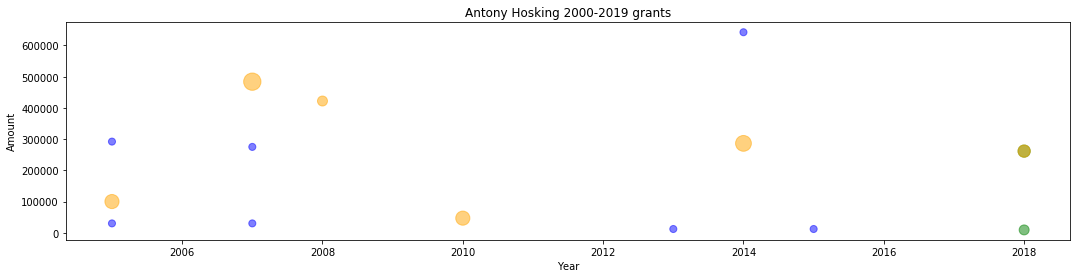

In [5]:
sct_plot(query, years)

In [6]:
def pub_cit_plot(query, years):
    _, df = search_grant_data(query, years)
    grant_ids = [int(v) for v in df.id.values]
    x = []; y = []; s = []; c = []
    for gid in grant_ids:
        res = grant_analysis(gid)
        if res == None:
            continue
        year, award_id, _, _, _, grant_amount, nun_pubs, _, num_citations = res
        x.append(nun_pubs)
        y.append(num_citations)
        s.append(grant_amount)
        c.append(year)
    plt.figure(figsize=(8,8))
    plt.title("{} {} {}-{} grants".format(query["firstname"], query["lastname"], years[0], years[-1]))
    plt.ylabel("Number of Citations per publication")
    plt.xlabel("Number of Publications")
    plt.scatter(x, y, alpha=0.5, 
                s=[np.sqrt(v) for v in s], c=c, cmap=plt.get_cmap("viridis"))
    plt.colorbar()

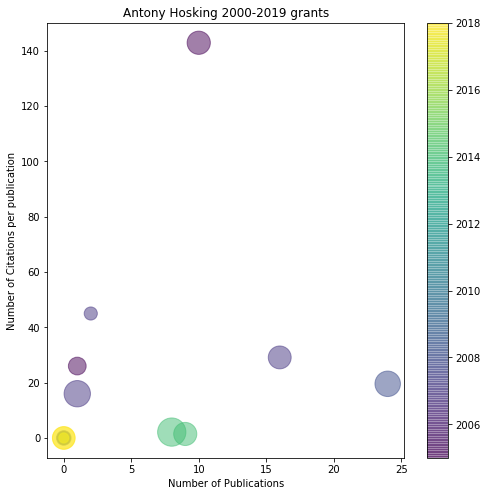

In [7]:
pub_cit_plot(query, years)

 year   amount              type                           role                                              title
 2000   226419  Continuing grant         Principal Investigator  Collaborative Research:  Data Mining:  Theory ...
 2000   197058    Standard Grant         Principal Investigator  Scalable Enterprise Systems: Coopetitive Desig...
 2000  1784255  Continuing grant      Co-Principal Investigator  ITR: Exploiting Style as Retrieval and Classif...
 2002   165000  Continuing grant         Principal Investigator   Timber:  A Native XML Database Management System
 2002   400000  Continuing grant         Principal Investigator  ITR/IIS: Querying Heterogeneous and Uncertain ...
 2002    98340    Standard Grant         Principal Investigator  Workshop on Data Management Technology for Mol...
 2003   550000  Continuing grant  Former Principal Investigator  RI:  An Infrastructure for Wide Area Pervasive...
 2004   600000    Standard Grant         Principal Investigator  SoD: Incrementa

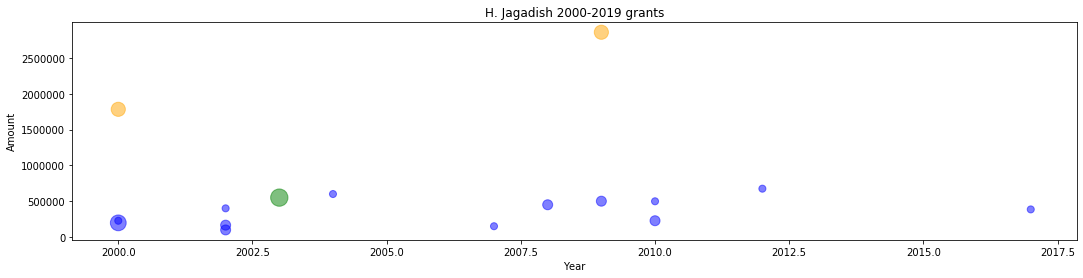

In [8]:
query = {"firstname": "H.", "lastname": "Jagadish"}
sct_plot(query, years)

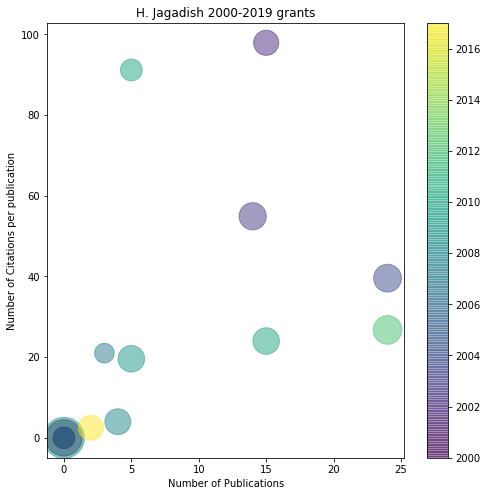

In [9]:
pub_cit_plot(query, years)